In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_excel(r"C:\Users\PC\Desktop\master thesis.xlsx")
df

,Location,Square feet,Rooms,Bathrooms,Contsruction year,Construction material,Number of levels,Close to the sea(<500m),Close to the center,Floor,Number of balconies,Heat,Renovated,Garden,Postcard,Parking,Price
0,Athens,105,3,2,1973,brick,1,no,yes,1,1,central,no,no,10434,no,134000.0
1,Athens,64,2,1,1961,brick,1,no,yes,2,1,autonomous,no,no,11362,no,105000.0
2,Athens,106,4,1,1954,brick,1,no,yes,0,1,gas,no,no,11361,no,140000.0
3,Athens,23,1,1,1970,brick,1,no,yes,0,1,autonomous,yes,yes,11364,no,55000.0
4,Athens,132,4,2,2007,brick,1,no,yes,6,1,gas,no,yes,11855,yes,590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Larissa,91,2,1,1999,brick,1,no,yes,4,2,autonomous,no,no,41222,yes,121000.0
545,Larissa,143,5,1,1978,brick,1,no,yes,4,3,central,yes,no,41221,no,220000.0
546,Larissa,82,4,2,1980,brick,1,no,yes,5,2,autonomous,no,no,41221,no,119000.0
547,Larissa,71,3,1,1972,brick,1,no,yes,2,1,autonomous,yes,no,41224,no,790000.0


In [59]:
df.isna().sum()

Location                   0
Square feet                0
Rooms                      0
Bathrooms                  0
Contsruction year          0
Construction material      0
Number of levels           0
Close to the sea(<500m)    0
Close to the center        0
Floor                      0
Number of balconies        0
Heat                       0
Renovated                  0
Garden                     0
Postcard                   0
Parking                    0
Price                      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [60]:
len(df)

549

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 549 non-null    object 
 1   Square feet              549 non-null    int64  
 2   Rooms                    549 non-null    int64  
 3   Bathrooms                549 non-null    int64  
 4   Contsruction year        549 non-null    int64  
 5   Construction material    549 non-null    object 
 6   Number of levels         549 non-null    int64  
 7   Close to the sea(<500m)  549 non-null    object 
 8   Close to the center      549 non-null    object 
 9   Floor                    549 non-null    int64  
 10  Number of balconies      549 non-null    int64  
 11  Heat                     549 non-null    object 
 12  Renovated                549 non-null    object 
 13  Garden                   549 non-null    object 
 14  Postcard                 5

In [28]:
X=df.drop(columns=['Price'])
y=df['Price']


In [29]:
from sklearn.preprocessing import OneHotEncoder


In [30]:
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [31]:
ohetransform = ohe.fit_transform(df[['Parking','Heat','Renovated','Garden','Close to the center','Construction material','Location','Close to the sea(<500m)']])

In [32]:
ohetransform.head()

,Parking_no,Parking_yes,Heat_autonomous,Heat_central,Heat_gas,Heat_none,Renovated_no,Renovated_yes,Garden_no,Garden_yes,Close to the center_no,Close to the center_yes,Construction material_brick,Location_Athens,Location_Larissa,Location_Patra,Location_Piraeus,Location_Thessaloniki,Close to the sea(<500m)_no,Close to the sea(<500m)_yes
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
combined_X=pd.concat([df, ohetransform],axis=1).drop(columns=['Price','Parking','Heat','Renovated','Garden','Close to the center','Construction material','Location','Close to the sea(<500m)'])


In [34]:
combined_X.head()

,Square feet,Rooms,Bathrooms,Contsruction year,Number of levels,Floor,Number of balconies,Postcard,Parking_no,Parking_yes,...,Close to the center_no,Close to the center_yes,Construction material_brick,Location_Athens,Location_Larissa,Location_Patra,Location_Piraeus,Location_Thessaloniki,Close to the sea(<500m)_no,Close to the sea(<500m)_yes
0,105,3,2,1973,1,1,1,10434,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,64,2,1,1961,1,2,1,11362,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,106,4,1,1954,1,0,1,11361,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,1,1,1970,1,0,1,11364,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,132,4,2,2007,1,6,1,11855,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_train,X_test,y_train,y_test=train_test_split(combined_X,y,test_size=0.2,random_state=4)

In [36]:
train_data=X_train.join(y_train)

array([[<Axes: title={'center': 'Square feet'}>,
        <Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Contsruction year'}>,
        <Axes: title={'center': 'Number of levels'}>],
       [<Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'Number of balconies'}>,
        <Axes: title={'center': 'Postcard'}>,
        <Axes: title={'center': 'Parking_no'}>,
        <Axes: title={'center': 'Parking_yes'}>],
       [<Axes: title={'center': 'Heat_autonomous'}>,
        <Axes: title={'center': 'Heat_central'}>,
        <Axes: title={'center': 'Heat_gas'}>,
        <Axes: title={'center': 'Heat_none'}>,
        <Axes: title={'center': 'Renovated_no'}>],
       [<Axes: title={'center': 'Renovated_yes'}>,
        <Axes: title={'center': 'Garden_no'}>,
        <Axes: title={'center': 'Garden_yes'}>,
        <Axes: title={'center': 'Close to the center_no'}>,
        <Axes: title={'center': 'Close to the center_y

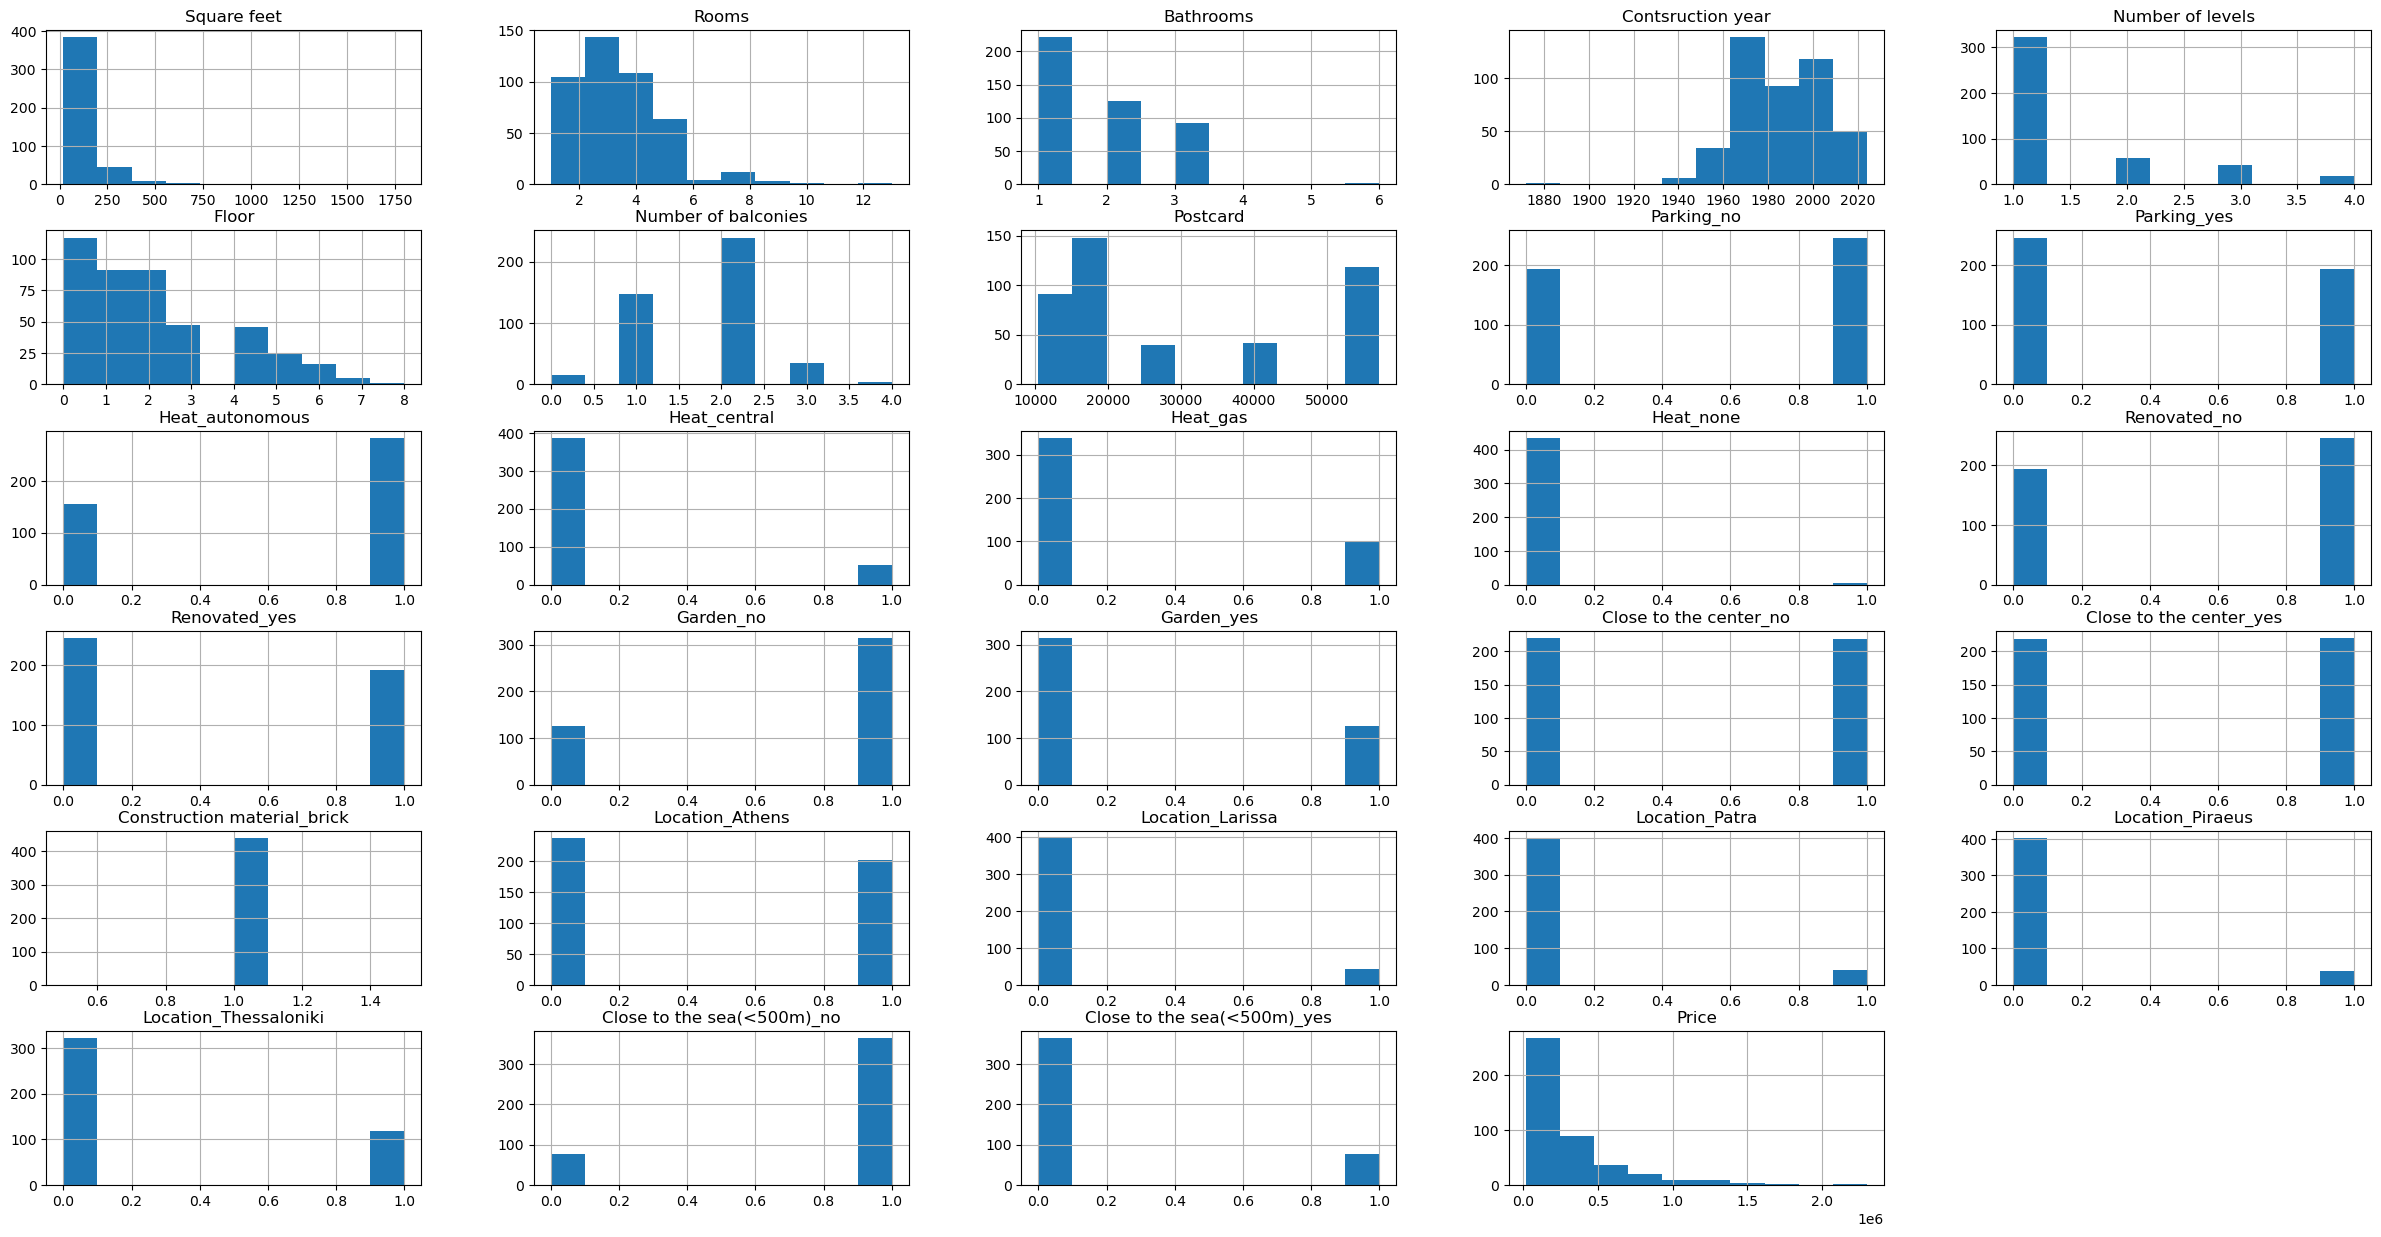

In [37]:
train_data.hist(figsize=(30,15))

<Axes: >

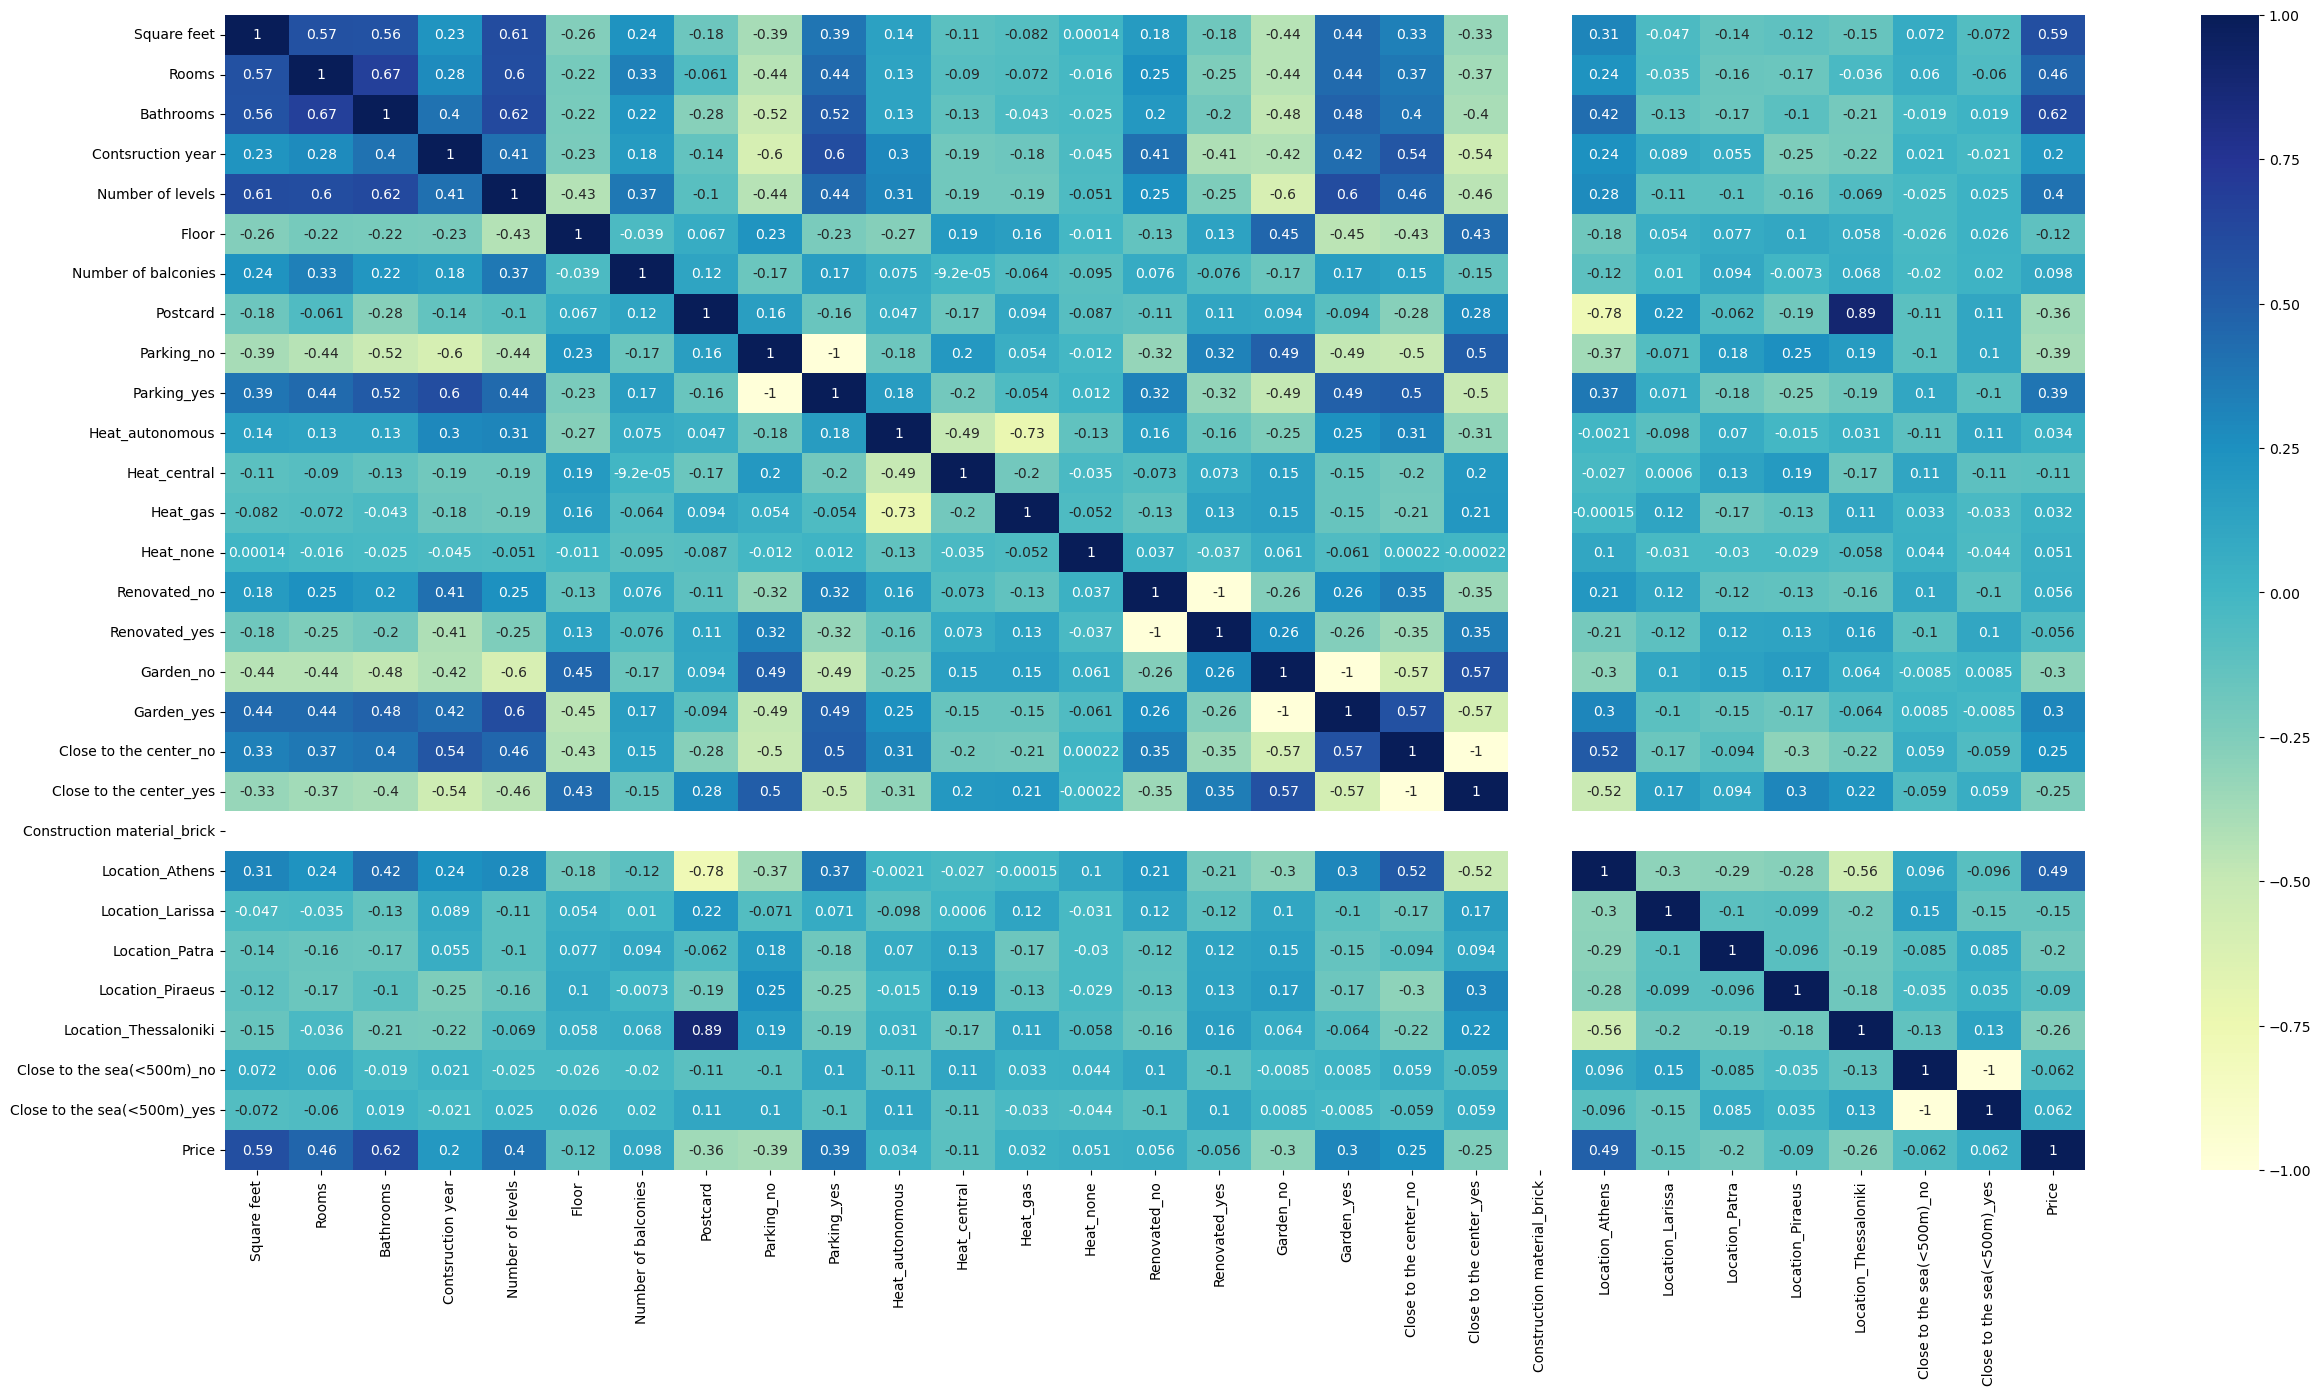

In [38]:
plt.figure(figsize=(30,15))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [39]:
reg=RandomForestRegressor()

In [40]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
print(reg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [42]:
y_pred=reg.predict(X_train)

In [43]:
from sklearn import metrics

In [44]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9513400957091053
Adjusted R^2: 0.9480169802941173
MAE: 38551.77443507972
MSE: 5466541845.6465645
RMSE: 73936.06593298406


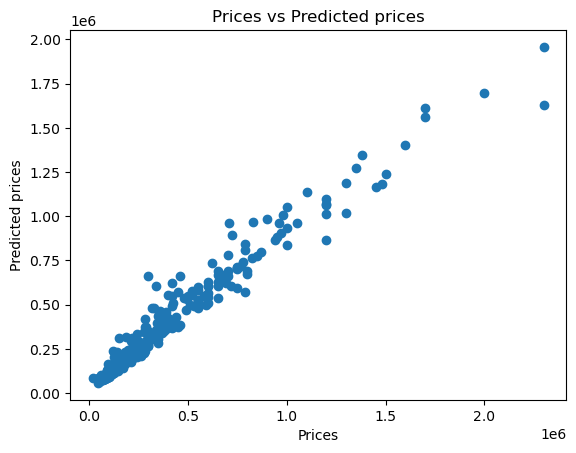

In [45]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()